In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns

In [393]:
# Data manipulation:

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments
def colorline(x, y, color, z=None, norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    cmap=plt.get_cmap(color)
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc

In [394]:
df = pd.read_csv('sentiments.csv')
df_topics = pd.read_csv('topics-quant_max.csv', header=0)
df=df.drop('Unnamed: 0.1', axis=1)
df=df.drop('Unnamed: 0', axis=1)

In [395]:
df_topics.head()

,incident parkland (1),incident mass shooting (1),guns ar 15,incident parkland (2),government trump,culture national identity,meta opinions,gun control national identity,meta meta,gun control bans,...,gun control second ammendment (2),gun control nra,guns assault weapons (2),guns sales,culture government,incident mass shooting (2),paper,aid,max_top,general
0,0.042322,0.000000,0.000000,0.015700,0.022909,0.171845,0.006615,0.058820,0.000000,0.010476,...,0.007788,0.060155,0.000000,0.0,0.000000,0.000000,wsj,wsj0,culture national identity,culture
1,0.078540,0.000000,0.012007,0.051582,0.030943,0.162456,0.000000,0.052241,0.000000,0.000000,...,0.000000,0.015661,0.000000,0.0,0.000000,0.000000,wsj,wsj8,culture national identity,culture
2,0.000000,0.000000,0.000000,0.013689,0.026811,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000236,0.009360,0.012419,0.0,0.201927,0.007424,wsj,wsj15,culture government,culture
3,0.010037,0.004265,0.000000,0.047053,0.000000,0.029974,0.012355,0.059780,0.000665,0.043931,...,0.000000,0.000175,0.081062,0.0,0.117267,0.007042,wsj,wsj21,culture government,culture
4,0.000000,0.074249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.037849,0.0,0.315660,0.000000,wsj,wsj28,culture government,culture


In [396]:
df_sent = df[(df.p_pos >= 0.65) | (df.p_neg >= 0.65)]
df_sent['positive']= np.where(df_sent['p_pos']>=0.65, 1, 0)
df_sent['negative']= np.where(df_sent['p_neg']>=0.65, 1, 0)
df_sent.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,aid,paper,author,date,url,sent,p_pos,p_neg,positive,negative
3,wsj3,wsj,[],NaN,http://www.wsj.com/video/how-student-survivors...,pos,0.976332,0.023668,1,0
4,wsj4,wsj,"['Heather Haddon', 'Google', 'Heather.Haddon W...",NaN,https://www.wsj.com/articles/kroger-to-stop-se...,pos,0.739436,0.260564,1,0
5,wsj5,wsj,"['Jason L. Riley', 'Jason.Riley Wsj.Com']",NaN,https://www.wsj.com/articles/gun-control-misse...,pos,0.999709,0.000291,1,0
6,wsj6,wsj,"['Vanessa Fuhrmans', 'Rachel Feintzeig', 'Vane...",NaN,https://www.wsj.com/articles/ceos-choose-sides...,pos,0.739436,0.260564,1,0
7,wsj7,wsj,"['Jon Kamp', 'Shibani Mahtani', 'Jon.Kamp Wsj....",NaN,https://www.wsj.com/articles/states-consider-l...,pos,0.999902,0.000098,1,0


In [397]:
grp=df_sent.groupby('paper', as_index=False).sum()
grp['neg_ratio'] = (grp['negative']/(grp['positive']+grp['negative']))*100
grp['pos_ratio'] = (grp['positive']/(grp['positive']+grp['negative']))*100
grp.set_index(['paper'])
grp.head()

,paper,p_pos,p_neg,positive,negative,neg_ratio,pos_ratio
0,blaze,304.059131,121.940869,327,99,23.239437,76.760563
1,breitbart,240.548730,95.451270,252,84,25.000000,75.000000
2,fox,251.689687,129.310313,264,117,30.708661,69.291339
3,huffpo,226.523674,70.476326,246,51,17.171717,82.828283
4,inforwars,179.868102,74.131898,184,70,27.559055,72.440945


In [398]:
df_media_ranks = pd.read_csv('trustmatrix.csv', header=0)
df_media_ranks.head()

,paper,trust,polarity,rank,cons_pol,lib_pol
0,wsj,4,1,3,1,-1
1,npr,5,4,1,-4,4
2,msnbc,1,1,0,-1,1
3,blaze,3,4,-1,4,-4
4,nyt,2,3,-1,-3,3


In [399]:
papers = ['Infowars', 'The Blaze', 'Breitbart', 'Fox', 'WSJ', 'MSNBC', 'Huff Post', 'NYT', 'NPR', 'The Nation']
grp_sent_rank = pd.merge(grp, df_media_ranks, on=['paper', 'paper'])
gsr=grp_sent_rank.sort_values('lib_pol')
gsr=gsr.set_index(np.arange(len(gsr.index)))
gsr.head()

,paper,p_pos,p_neg,positive,negative,neg_ratio,pos_ratio,trust,polarity,rank,cons_pol,lib_pol
0,inforwars,179.868102,74.131898,184,70,27.559055,72.440945,-5,5,-10,5,-5
1,blaze,304.059131,121.940869,327,99,23.239437,76.760563,3,4,-1,4,-4
2,breitbart,240.548730,95.451270,252,84,25.000000,75.000000,-2,3,-5,3,-3
3,fox,251.689687,129.310313,264,117,30.708661,69.291339,-1,2,-3,2,-2
4,wsj,252.075525,77.924475,273,57,17.272727,82.727273,4,1,3,1,-1


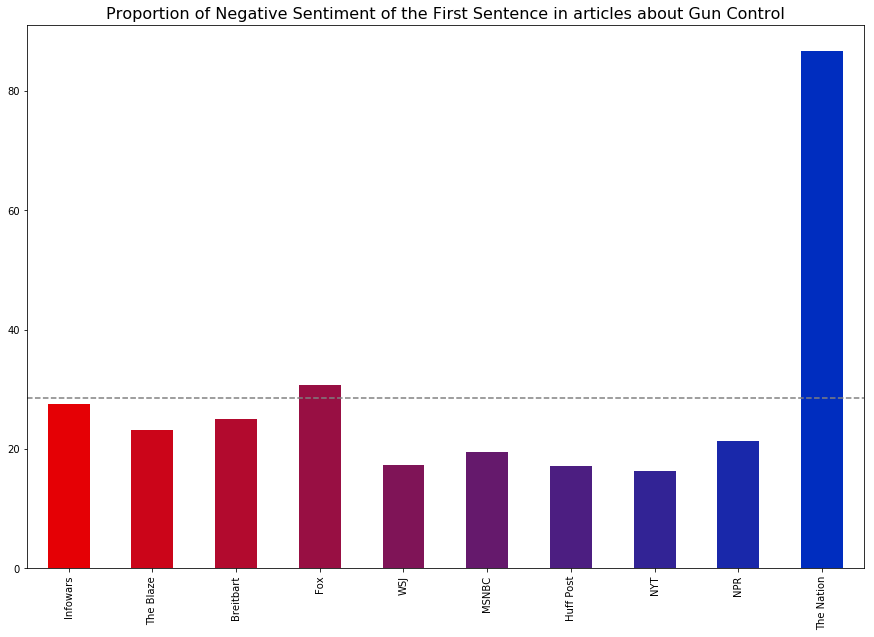

In [400]:
def make_bars(my_series, filename, title):
    s = pd.Series(list(my_series), index = papers)
    mean = my_series.mean()
    plt.figure(figsize=(15,10))
    plt.axhline(mean, color='grey', linestyle='--')
    ax = plt.gca()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_title(title+"articles about Gun Control", fontsize=16)
    mycolors = ['#E50005', '#cb0519','#b20a2e', '#980f43', '#7f1457', '#65196c', '#4c1e81', '#322395', '#1928aa', '#002dbf' ]
    s.plot(kind='bar', color=mycolors,)
    plt.savefig(filename+'.svg', dpi=1000)
    plt.savefig(filename+'.png', transparent=True)
    
make_bars(gsr['neg_ratio'], 'avg_sent', "Proportion of Negative Sentiment of the First Sentence in ")

In [401]:
df['subjective'] = np.where((df.p_pos >= 0.65) | (df.p_neg >= 0.65), 1, 0)
total_subj_s = (df.groupby('paper')['subjective'].count())
subjective_s = (df.groupby('paper')['subjective'].sum())
df_subj = (subjective_s / total_subj_s)*100
df_subj

paper
blaze        83.040936
breitbart    77.777778
fox          81.410256
huffpo       66.000000
inforwars    76.506024
msnbc        80.606061
nation       97.142857
npr          80.000000
nyt          75.776398
wsj          73.825503
Name: subjective, dtype: float64

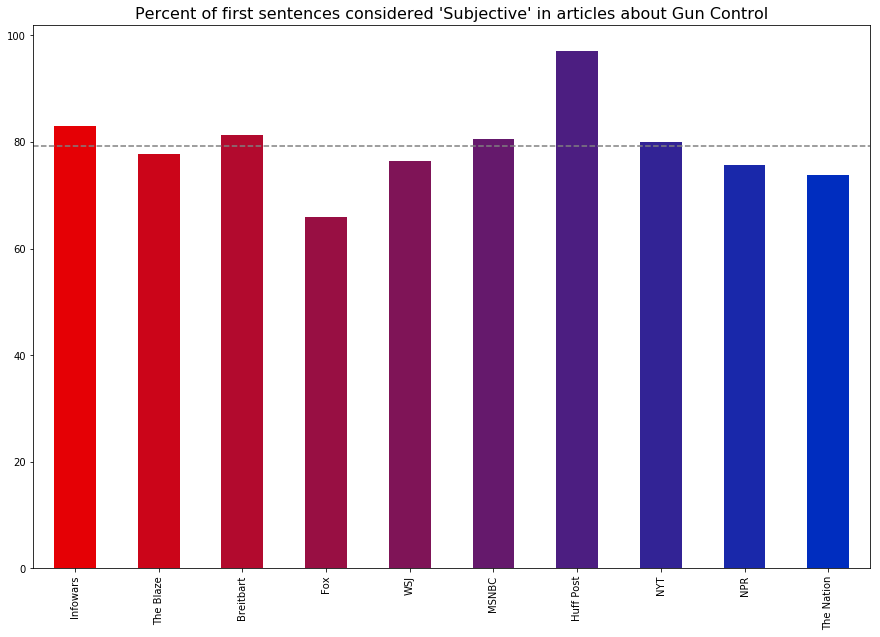

In [402]:
make_bars(df_subj, 'percent_subjective', "Percent of first sentences considered 'Subjective' in ")

In [403]:
df_topics_sent = pd.merge(df, df_topics, on=['aid', 'aid'])
df_topics_sent.head()
df_ts = df.merge(df_topics[['aid','max_top', 'general']], on = 'aid', how='left')
df_ts['negative']= np.where(df_ts['p_neg']>=0.65, 1, 0)
df_ts.head()

,aid,paper,author,date,url,sent,p_pos,p_neg,subjective,max_top,general,negative
0,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956,0,culture national identity,culture,0
1,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956,0,incident parkland (2),incident,0
2,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956,0,meta opinions,meta,0
3,wsj1,wsj,"['Sarah Krouse', 'Sarah.Krouse Wsj.Com']",NaN,https://www.wsj.com/articles/blackrock-goes-pu...,pos,0.508808,0.491192,0,guns sales,guns,0
4,wsj1,wsj,"['Sarah Krouse', 'Sarah.Krouse Wsj.Com']",NaN,https://www.wsj.com/articles/blackrock-goes-pu...,pos,0.508808,0.491192,0,guns assault weapons (1),guns,0


In [404]:
total_ts=df_ts.groupby(['general'])['subjective'].count()
subject_ts=df_ts.groupby(['general'])['subjective'].sum()
ratio_subj_ts = (subject_ts/total_ts)*100
ratio_subj_ts.drop(['meta'], inplace=True)
ratio_subj_ts.head()

general
culture        81.084489
government     78.106509
gun control    77.986348
guns           76.766150
incident       79.074447
Name: subjective, dtype: float64

In [405]:
negative_ts=df_ts.groupby(['general'])['negative'].sum()
ratio_neg_ts = (negative_ts/total_ts)*100
ratio_neg_ts.drop(['meta'], inplace=True)
ratio_neg_ts.sort_values(inplace=True)

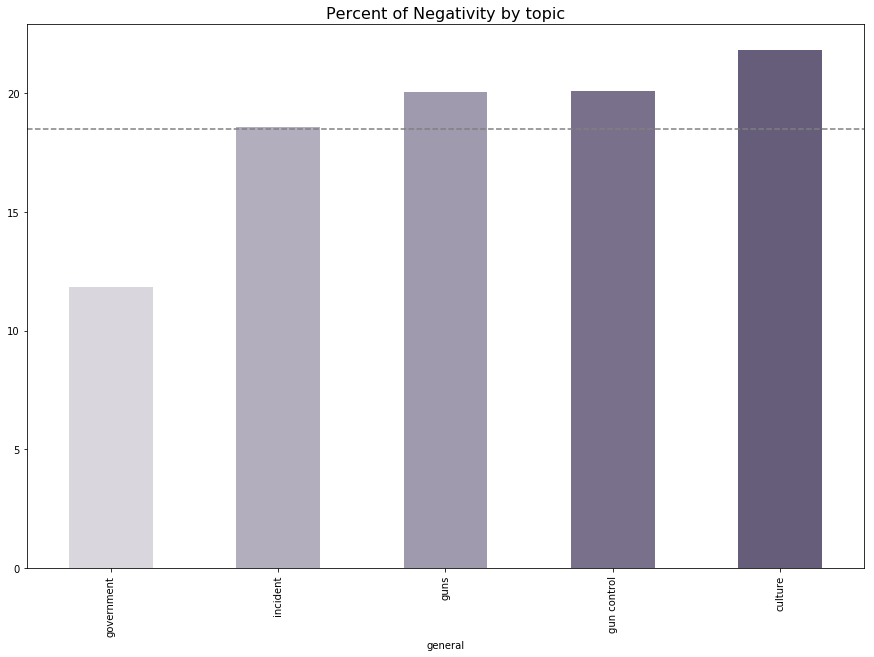

In [406]:
def make_topic_bars(my_series, title, filename):
    mean = my_series.mean()
    plt.figure(figsize=(15,10))
    plt.axhline(mean, color='grey', linestyle='--')
    ax = plt.gca()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_title(title, fontsize=16)
    mycolors = ['#d9d6de', '#b3aebd', '#9f9aad', '#79718c', '#665d7b']
    my_series.plot(kind='bar', color = mycolors)
    plt.savefig(filename+'.svg', dpi=1000)
    plt.savefig(filename+'.png', transparent=True)
    
make_topic_bars(ratio_neg_ts, "Percent of Negativity by topic", 'negative_topic')

In [462]:
paper_gen_df = df_ts.groupby(['general','paper'])['negative'].describe()
paper_gen_df=paper_gen_df.reset_index()
paper_gen_df.drop(paper_gen_df.columns[[2, 4,5,6,7, 8, 9]], axis=1, inplace=True)
pgd=paper_gen_df.pivot(index='paper', columns='general', values='mean')
pgd=pgd.merge(df_media_ranks, on=['paper'])
pgd = pgd.sort_values(by=['lib_pol']).fillna(0)
pgd

,paper,culture,government,gun control,guns,incident,meta,trust,polarity,rank,cons_pol,lib_pol
4,inforwars,0.125000,0.000000,0.218750,0.187500,0.257143,0.185185,-5,5,-10,5,-5
0,blaze,0.161290,0.000000,0.200000,0.205298,0.187970,0.187500,3,4,-1,4,-4
1,breitbart,0.444444,0.076923,0.173913,0.150685,0.250000,0.222222,-2,3,-5,3,-3
2,fox,0.300000,0.187500,0.283951,0.238095,0.271739,0.259259,-1,2,-3,2,-2
9,wsj,0.137255,0.125000,0.156250,0.130841,0.127451,0.039216,4,1,3,1,-1
5,msnbc,0.073171,0.000000,0.171429,0.182540,0.147287,0.169811,1,1,0,-1,1
3,huffpo,0.250000,0.090909,0.111111,0.083333,0.114754,0.081081,-3,2,-5,-2,2
8,nyt,0.103448,0.096154,0.094828,0.175000,0.106195,0.150943,2,3,-1,-3,3
7,npr,0.181818,0.000000,0.177419,0.194444,0.111111,0.210526,5,4,1,-4,4
6,nation,0.833333,1.000000,0.857143,0.843750,0.793103,0.888889,-4,5,-9,-5,5


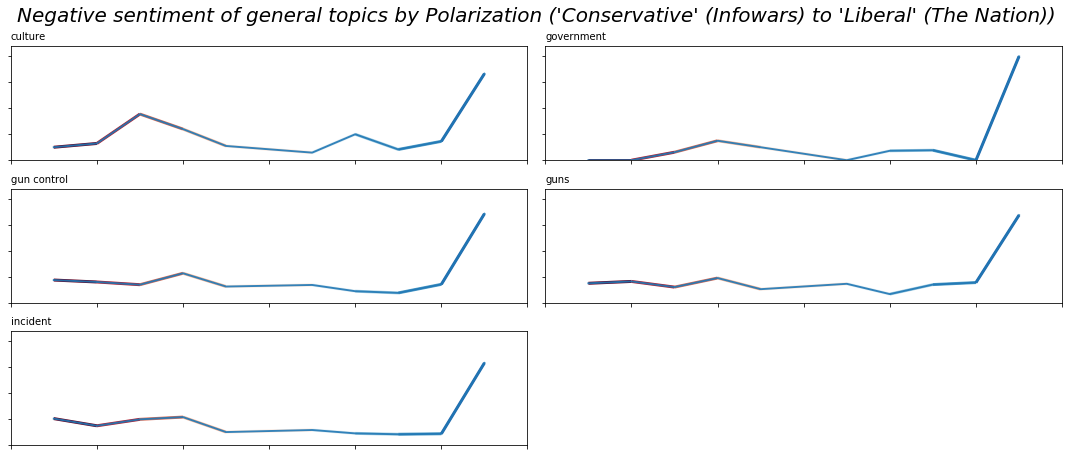

In [504]:
gen_topics = ['culture', 'government', 'gun control', 'guns', 'incident']
num = 0
plt.figure(figsize=(15,10))
for top in gen_topics:
    num+=1
    plt.subplot(5,2, num)
    x = pgd['lib_pol']
    y = pgd[top]
    plt.plot(x,y, marker='', linewidth=1.9, alpha=0.9, label = top)
    colorline(x,y, 'RdBu')
    plt.xlim(-6, 6)
    plt.ylim(0, 1.1)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.title(top, loc='left', fontsize=10, fontweight=0 )
else:
    pass

plt.tight_layout()
plt.suptitle("Negative sentiment of general topics by Polarization ('Conservative' (Infowars) to 'Liberal' (The Nation))", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)
plt.savefig('top_papers.svg', dpi=1000)
plt.savefig('top_papers.png', transparent=True, bbox_inches="tight")

In [483]:
paper_max_df = df_ts.groupby(['max_top','paper'])['negative'].describe()
paper_max_df=paper_max_df.reset_index()
paper_max_df.drop(paper_max_df.columns[[2, 4,5,6,7, 8, 9]], axis=1, inplace=True)
pmdf=paper_max_df.pivot(index='paper', columns='max_top', values='mean')
pmdf=pmdf.merge(df_media_ranks, on=['paper'])
pmdf = pmdf.sort_values(by=['lib_pol']).fillna(0)
pmdf

,paper,culture government,culture national identity,government trump,gun control background check,gun control bans,gun control legal,gun control national identity,gun control nra,gun control second ammendment (1),...,incident nyc,incident parkland (2),incident video,meta meta,meta opinions,trust,polarity,rank,cons_pol,lib_pol
4,inforwars,0.000000,0.200000,0.000000,0.153846,0.666667,0.200000,0.181818,0.400000,0.200000,...,0.250000,0.285714,0.000000,0.500000,0.160000,-5,5,-10,5,-5
0,blaze,0.166667,0.157895,0.000000,0.250000,0.454545,0.125000,0.189189,0.181818,0.136364,...,0.266667,0.212121,0.181818,0.117647,0.266667,3,4,-1,4,-4
1,breitbart,0.666667,0.333333,0.076923,0.142857,0.200000,0.272727,0.142857,0.166667,0.200000,...,0.300000,0.307692,0.000000,0.285714,0.193548,-2,3,-5,3,-3
2,fox,0.333333,0.277778,0.187500,0.400000,0.166667,0.277778,0.280000,0.333333,0.333333,...,0.428571,0.227273,0.258065,0.263158,0.250000,-1,2,-3,2,-2
9,wsj,0.066667,0.166667,0.125000,0.090909,0.153846,0.115385,0.230769,0.200000,0.200000,...,0.222222,0.116279,0.500000,0.000000,0.064516,4,1,3,1,-1
5,msnbc,0.230769,0.000000,0.000000,0.095238,0.166667,0.129032,0.241379,0.200000,0.166667,...,0.058824,0.096774,0.193548,0.037037,0.307692,1,1,0,-1,1
3,huffpo,0.500000,0.181818,0.090909,0.153846,0.250000,0.117647,0.034483,0.250000,0.166667,...,0.125000,0.235294,0.222222,0.000000,0.142857,-3,2,-5,-2,2
8,nyt,0.166667,0.058824,0.096154,0.222222,0.166667,0.040000,0.085714,0.200000,0.000000,...,0.266667,0.045455,0.083333,0.200000,0.086957,2,3,-1,-3,3
7,npr,0.142857,0.200000,0.000000,0.166667,0.222222,0.250000,0.135135,0.142857,0.111111,...,0.125000,0.148148,0.142857,0.200000,0.214286,5,4,1,-4,4
6,nation,0.900000,0.750000,1.000000,1.000000,0.750000,0.875000,0.875000,0.833333,0.750000,...,0.500000,0.916667,1.000000,0.857143,0.909091,-4,5,-9,-5,5


In [479]:
all_topics=list(pmdf.columns.values)[1:21]

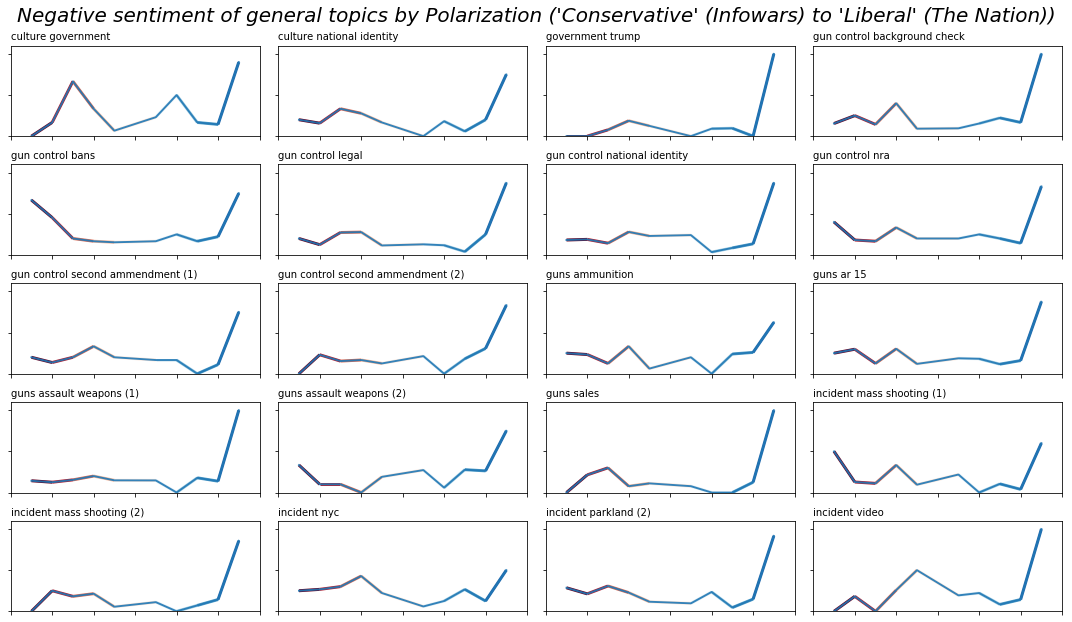

In [505]:
num = 0
plt.figure(figsize=(15,10))
for top in all_topics:
    num+=1
    plt.subplot(6,4, num)
    x = pmdf['lib_pol']
    y = pmdf[top]
    plt.plot(x,y, marker='', linewidth=1.9, alpha=0.9, label = top)
    colorline(x,y, 'RdBu')
    plt.xlim(-6, 6)
    plt.ylim(0, 1.1)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.title(top, loc='left', fontsize=10, fontweight=0 )
else:
    pass

plt.tight_layout()
plt.suptitle("Negative sentiment of general topics by Polarization ('Conservative' (Infowars) to 'Liberal' (The Nation))", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)
plt.savefig('top_papers_all.svg', dpi=1000)
plt.savefig('top_papers_all.png', transparent=True, bbox_inches="tight")

In [494]:
nation = pmdf.loc[pmdf['paper'] == 'nation']
nation= nation.T
nation

,6
paper,nation
culture government,0.9
culture national identity,0.75
government trump,1
gun control background check,1
gun control bans,0.75
gun control legal,0.875
gun control national identity,0.875
gun control nra,0.833333
gun control second ammendment (1),0.75


In [500]:
pmdf=pmdf.set_index('paper')
dfpm=pmdf.T
dfpm

paper,inforwars,blaze,breitbart,fox,wsj,msnbc,huffpo,nyt,npr,nation
culture government,0.000000,0.166667,0.666667,0.333333,0.066667,0.230769,0.500000,0.166667,0.142857,0.900000
culture national identity,0.200000,0.157895,0.333333,0.277778,0.166667,0.000000,0.181818,0.058824,0.200000,0.750000
government trump,0.000000,0.000000,0.076923,0.187500,0.125000,0.000000,0.090909,0.096154,0.000000,1.000000
gun control background check,0.153846,0.250000,0.142857,0.400000,0.090909,0.095238,0.153846,0.222222,0.166667,1.000000
gun control bans,0.666667,0.454545,0.200000,0.166667,0.153846,0.166667,0.250000,0.166667,0.222222,0.750000
gun control legal,0.200000,0.125000,0.272727,0.277778,0.115385,0.129032,0.117647,0.040000,0.250000,0.875000
gun control national identity,0.181818,0.189189,0.142857,0.280000,0.230769,0.241379,0.034483,0.085714,0.135135,0.875000
gun control nra,0.400000,0.181818,0.166667,0.333333,0.200000,0.200000,0.250000,0.200000,0.142857,0.833333
gun control second ammendment (1),0.200000,0.136364,0.200000,0.333333,0.200000,0.166667,0.166667,0.000000,0.111111,0.750000
gun control second ammendment (2),0.000000,0.230769,0.153846,0.166667,0.125000,0.214286,0.000000,0.181818,0.307692,0.833333


In [ ]:
for paper in papers:
    num+=1
    plt.subplot(5,2, num)
    x = dfpm['lib_pol']
    y = dfpm[paper]
    plt.plot(x,y, marker='', linewidth=1.9, alpha=0.9, label = top)

In [409]:
df_content = pd.read_csv('cleandataset.csv', header=0, index_col=0)
df_content_fox = df_content[df_content['paper']=='fox']
df_content_fox.head()

,aid,paper,author,date,url,content,clean_content
906,fox0,fox,['Adam Carrington'],2018-03-03 00:00:00,http://www.foxnews.com/opinion/2018/03/03/supr...,The debate about how to deal with guns in our ...,"['debate', 'deal', 'gun', 'country', 'rage', '..."
907,fox1,fox,"['Kaitlyn Schallhorn', '- Jonas Oransky', 'Eve...",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/gun...,In the weeks after a gunman walked into a high...,"['week', 'gunman', 'walked', 'high', 'school',..."
908,fox2,fox,['Kathleen Joyce'],2018-03-03 00:00:00,http://www.foxnews.com/us/2018/03/03/cmu-stude...,The 19-year-old student suspected of killing h...,"['19-year-old', 'student', 'suspected', 'killi..."
910,fox4,fox,['Gregg Re'],2018-03-02 00:00:00,http://www.foxnews.com/politics/2018/03/02/tru...,Just one day after putting the NRA on the defe...,"['one', 'day', 'putting', 'nra', 'defensive', ..."
911,fox5,fox,"['Brooke Singman', '- President Trump']",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/tru...,President Trump has touched off new tensions w...,"['president', 'trump', 'touched', 'new', 'tens..."
